<a href="https://colab.research.google.com/github/Rhythm1821/pytorch-nn-training/blob/main/pytorch_nn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Neural Network training with different datasets

## 1 Regression Neural Network


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
X,y = make_regression(n_samples=1000,n_features=10,noise=2)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [ ]:
class RegressionNN(nn.Module):
  def __init__(self,
               input_features,
               hidden_units,
               output_features):
    super().__init__()
    self.linear_layer_1 = nn.Linear(in_features=input_features,out_features=hidden_units)
    self.linear_layer_2 = nn.Linear(in_features=hidden_units,out_features=hidden_units)
    self.linear_layer_3 = nn.Linear(in_features=hidden_units,out_features=output_features)
  def forward(self,x):
    return self.linear_layer_3(self.linear_layer_2(self.linear_layer_1(x)))

In [ ]:
model_0 = RegressionNN(input_features=10,hidden_units=10,output_features=1)
model_0.to(device)

RegressionNN(
  (linear_layer_1): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters())

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
train_loss_val=[]
test_loss_val=[]
epoch_count=[]

epochs = 1001
X_train,X_test = X_train.to(device,torch.float32),X_test.to(device,torch.float32)
y_train,y_test = y_train.to(device,torch.float32),y_test.to(device,torch.float32)

for epoch in range(epochs):
  # Train the model
  model_0.train()


  y_pred = model_0(X_train)

  loss = loss_fn(y_train.unsqueeze(dim=1),y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing the data
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(y_test.unsqueeze(dim=1),test_pred)

  if epoch%100==0:
    train_loss_val.append(loss)
    test_loss_val.append(test_loss)
    epoch_count.append(epoch)
    print(f'Epoch: {epoch} | Train loss: {loss}: .2f | Test loss: {test_loss: .2f}')

Epoch: 0 | Train loss: 129.37290954589844 | Test loss: 109.01475524902344
Epoch: 100 | Train loss: 127.90333557128906 | Test loss: 107.60511779785156
Epoch: 200 | Train loss: 118.0063247680664 | Test loss: 98.47895050048828
Epoch: 300 | Train loss: 89.7948989868164 | Test loss: 74.02486419677734
Epoch: 400 | Train loss: 45.8370246887207 | Test loss: 41.32440185546875
Epoch: 500 | Train loss: 12.167272567749023 | Test loss: 11.94042682647705
Epoch: 600 | Train loss: 1.5477523803710938 | Test loss: 1.6504192352294922
Epoch: 700 | Train loss: 1.543518304824829 | Test loss: 1.6381908655166626
Epoch: 800 | Train loss: 1.5435625314712524 | Test loss: 1.6387035846710205
Epoch: 900 | Train loss: 1.5434588193893433 | Test loss: 1.6368392705917358
Epoch: 1000 | Train loss: 1.5434304475784302 | Test loss: 1.637042760848999


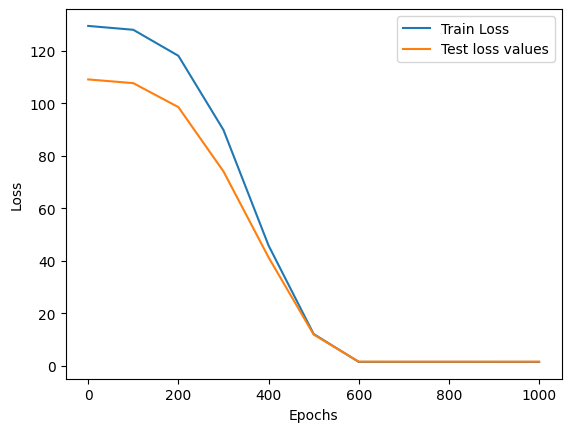

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Assuming you have already defined the epoch_count, train_loss_val, and test_loss_val variables

plt.plot(epoch_count, np.array(torch.tensor(train_loss_val).cpu().numpy()), label='Train Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_val).cpu().numpy()), label='Test loss values')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [ ]:
model_0.train()

with torch.inference_mode():
  test_pred = model_0(X_test)
  loss = loss_fn(y_test,test_pred)
  print(f'Test loss: {test_loss}')

Test loss: 1.637042760848999


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


## 2 Binary Classification Neural Network

In [137]:
from sklearn.datasets import make_classification

In [138]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [140]:
X_train,X_test = X_train.to(device,dtype=torch.float32), X_test.to(device,dtype=torch.float32)
y_train,y_test = y_train.to(device,dtype=torch.float32),y_test.to(device,dtype=torch.float32)

In [141]:
class BinaryNN(nn.Module):
  def __init__(self,in_features,hidden_units,out_features):
    super().__init__()
    self.linear_block_1 = nn.Linear(in_features=in_features,
                                                  out_features=out_features)
                                        # nn.functional.sigmoid(input=))
  def forward(self,x):
    return nn.Sigmoid()(self.linear_block_1(x))

In [142]:
model_1 = BinaryNN(in_features=10,
              hidden_units=10,
              out_features=1).to(device)

In [143]:
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

In [144]:
loss_fn = nn.BCELoss()
acc_fn = Accuracy(task='binary').to(device)
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [145]:
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape}')

X_train: torch.Size([800, 10]) | X_test: torch.Size([200, 10]) | y_train: torch.Size([800]) | y_test: torch.Size([200])


In [146]:
train_loss_val=[]
test_loss_val=[]
epoch_count=[]
epochs = 1001

for epoch in range(epochs):
  # Train the model
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)
  # print(f'y_pred: {y_pred}')
  # Calculate the loss
  loss = loss_fn(y_pred.squeeze(dim=1),y_train)
  acc = acc_fn(y_pred.squeeze(dim=1),y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  with torch.inference_mode():
    model_1.eval()

    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred.squeeze(dim=1),y_test)
    test_acc = acc_fn(test_pred.squeeze(dim=1),y_test)

  if epoch%100==0:
    train_loss_val.append(loss)
    test_loss_val.append(test_loss)
    epoch_count.append(epoch)
    print(f'Epoch: {epoch} | Train loss: {loss: .2f} | Train accuracy: {acc: .2f} | Test loss: {test_loss: .2f} | Test accuracy: {test_acc: .2f}')

Epoch: 0 | Train loss:  0.70 | Train accuracy:  0.54 | Test loss:  0.66 | Test accuracy:  0.60
Epoch: 100 | Train loss:  0.44 | Train accuracy:  0.89 | Test loss:  0.41 | Test accuracy:  0.91
Epoch: 200 | Train loss:  0.34 | Train accuracy:  0.94 | Test loss:  0.31 | Test accuracy:  0.96
Epoch: 300 | Train loss:  0.29 | Train accuracy:  0.95 | Test loss:  0.26 | Test accuracy:  0.96
Epoch: 400 | Train loss:  0.26 | Train accuracy:  0.95 | Test loss:  0.23 | Test accuracy:  0.96
Epoch: 500 | Train loss:  0.24 | Train accuracy:  0.96 | Test loss:  0.21 | Test accuracy:  0.96
Epoch: 600 | Train loss:  0.23 | Train accuracy:  0.96 | Test loss:  0.19 | Test accuracy:  0.96
Epoch: 700 | Train loss:  0.21 | Train accuracy:  0.96 | Test loss:  0.18 | Test accuracy:  0.96
Epoch: 800 | Train loss:  0.21 | Train accuracy:  0.96 | Test loss:  0.17 | Test accuracy:  0.97
Epoch: 900 | Train loss:  0.20 | Train accuracy:  0.96 | Test loss:  0.16 | Test accuracy:  0.96
Epoch: 1000 | Train loss:  0.19 

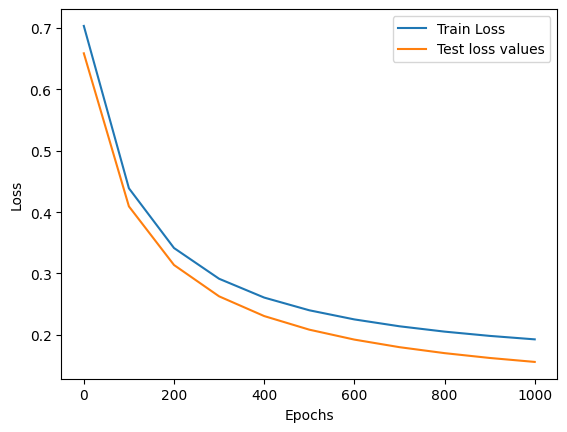

In [147]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Assuming you have already defined the epoch_count, train_loss_val, and test_loss_val variables

plt.plot(epoch_count, np.array(torch.tensor(train_loss_val).cpu().numpy()), label='Train Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_val).cpu().numpy()), label='Test loss values')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()
